In [25]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import shap

In [1]:
from sklearn.ensemble import ExtraTreesRegressor, StackingRegressor

In [2]:
model10 = ExtraTreesRegressor(n_estimators=200)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
df_org_modified6 = pd.read_csv('/content/df_orange_preprocessed4_std_scaled.csv')
df_org_modified6 = df_org_modified6.drop('Unnamed: 0',axis=1)

In [4]:
df_org_modified6 = pd.read_csv('C:/Users/thsong/df_orange_preprocessed4_std_scaled.csv')
df_org_modified6 = df_org_modified6.drop('Unnamed: 0',axis=1)

In [ ]:
df_org_modified6.columns

Index(['연간_생산량', '규격별_생산비율(2L)', '규격별_생산비율(L)', '규격별_생산비율(M)', '규격별_생산비율(S)',
       '규격별_생산비율(2S)', '조수익', '조수익_킬로그램판매가격', '출하처_농협', '출하처_감협', '출하처_상인',
       '출하처_개인판매', '평균당도(브릭스)', '평균당도_평균산도(퍼센트)', '비료_1월', '비료_2월', '비료_3월',
       '비료_4월', '비료_5월', '비료_6월', '비료_7월', '비료_8월', '비료_9월', '비료_10월',
       '비료_11월', '비료_12월', '봄비료_킬로그램', '봄비료_복합비료', '봄비료_유기질(퇴비)', '가을비료_킬로그램',
       '가을비료_복합비료', '가을비료_유기질(퇴비)', '미생물_및_액비_살포_생선액비', '미생물_및_액비_살포_막걸리',
       '미생물_및_액비_살포_이엠균', '연간_농약살포_횟수', '살포방법_직접살포_횟수', '재배면적(제곱미터)',
       '재배면적(평)', '나무수령', '묘목방식', '고접방식', '가온', '보조가온', '무가온', '자동개폐기', '난방기',
       '환풍기', '송풍팬', '보온커튼', '무인방제기', '스마트팜', '품종_레드향', '품종_천혜향', '품종_한라봉',
       '중간대목_온주', '중간대목_궁천', '중간대목_천혜향', '중간대목_일반공천', '중간대목_한라봉', '중간대목_작감',
       '중간대목_일반조생', '중간대목_레볼오렌지', '중간대목_황금향', '중간대목_진시황', '중간대목_청견/일반조생',
       '중간대목_200평은 한라봉', '중간대목_500평은 진지향', '중간대목_조생나무', '중간대목_탱자나무',
       '중간대목_궁천 조생', '중간대목_일반온주', '중간대목_조생온주', '중간대목_레드향', '중간대목_일반조정',
       '중간대목_온주밀감', 'comp1_

In [5]:
df_org_modified6.rename(columns = {'연간_생산량':'annual_production','규격별_생산비율(2L)':'production_rate_by_size(2L)','규격별_생산비율(L)':'production_rate_by_size(L)','규격별_생산비율(M)':'production_rate_by_size(M)',
'규격별_생산비율(S)':'production_rate_by_size(S)','규격별_생산비율(2S)':'production_rate_by_size(2S)','조수익':'income','조수익_킬로그램판매가격':'income_sales_price/kilogram','출하처_농협':'ship_destination_NH',
'출하처_감협':'ship_destination_GH','출하처_상인':'ship_destination_MCH','출하처_개인판매':'ship_destination_INDV','평균당도(브릭스)':'avg_sugar_content(Brix)','평균당도_평균산도(퍼센트)':'avg_sugar_content(Percent)',
'비료_1월':'FERT_JAN','비료_2월':'FERT_FEB','비료_3월':'FERT_MAR','비료_4월':'FERT_APR','비료_5월':'FERT_MAY','비료_6월':'FERT_JUN','비료_7월':'FERT_JUL','비료_8월':'FERT_AUG','비료_9월':'FERT_SEP','비료_10월':'FERT_OCT',
'비료_11월':'FERT_NOV','비료_12월':'FERT_DEC','봄비료_킬로그램':'spring_fert/kilogram','봄비료_복합비료':'spring_fert_composite','봄비료_유기질(퇴비)':'spring_fert_organic','가을비료_킬로그램':'autumn_fert/kilogram',
'가을비료_복합비료':'autumn_fert_composite','미생물_및_액비_살포_생선액비':'microbe_liquid_fert_fish','미생물_및_액비_살포_막걸리':'microbe_liquid_fert_makgeolli','미생물_및_액비_살포_이엠균':'microbe_liquid_fert_em',
'연간_농약살포_횟수':'number_of_pesticide_app','살포방법_직접살포_횟수':'number_of_direct_pesticide_app','재배면적(제곱미터)':'cultivation_area(m2)','재배면적(평)':'cultivation_area(pyeong)','나무수령':'tree_age',
'묘목방식':'seedling','고접방식':'top_working','가온':'heating','보조가온':'aux_heating','무가온':'unheating','자동개폐기':'auto_switch','난방기':'heater','환풍기':'ventilator','송풍팬':'fan','보온커튼':'thermal_screen',
'무인방제기':'auto_spray','스마트팜':'smart_farm','품종_레드향':'variety_redh','품종_천혜향':'variety_chhh','품종_한라봉':'variety_hllb','중간대목_온주':'interstock_onju','중간대목_궁천':'interstock_gungcheon',
'중간대목_천혜향':'interstock_chhh','중간대목_일반공천':'interstock_ilban_gongcheon','중간대목_한라봉':'interstock_hllb','중간대목_작감':'interstock_jakgam','중간대목_일반조생':'interstock_ilban_josaeng',
'중간대목_레볼오렌지':'interstock_revol_orange','중간대목_황금향':'interstock_hwanggeum_h','중간대목_진시황':'interstock_qin_shi_huang','중간대목_청견/일반조생':'interstock_cheonggyun/ilban_josaeng',
'중간대목_200평은 한라봉':'interstock_200p_hllb','중간대목_500평은 진지향':'interstock_500p_jjh','중간대목_조생나무':'interstock:josaeng_tree','중간대목_탱자나무':'interstock_hardy_orange','중간대목_궁천 조생':'interstock_gungcheon_josaeng',
'중간대목_일반온주':'interstock_ilban_onju','중간대목_조생온주':'interstock_josaeng_onju','중간대목_레드향':'interstock_redh','중간대목_일반조정':'interstock_ilban_jojeong','중간대목_온주밀감':'interstock_onju_milgam'
}, inplace=True)

In [ ]:
df_org_modified6.columns

Index(['annual_production', 'production_rate_by_size(2L)',
       'production_rate_by_size(L)', 'production_rate_by_size(M)',
       'production_rate_by_size(S)', 'production_rate_by_size(2S)', 'income',
       'income_sales_price/kilogram', 'ship_destination_NH',
       'ship_destination_GH', 'ship_destination_MCH', 'ship_destination_INDV',
       'avg_sugar_content(Brix', 'avg_sugar_content(Percent)', 'FERT_JAN',
       'FERT_FEB', 'FERT_MAR', 'FERT_APR', 'FERT_MAY', 'FERT_JUN', 'FERT_JUL',
       'FERT_AUG', 'FERT_SEP', 'FERT_OCT', 'FERT_NOV', 'FERT_DEC',
       'spring_fert/kilogram', 'spring_fert_composite', 'spring_fert_organic',
       'autumn_fert/kilogram', 'autumn_fert_composite', '가을비료_유기질(퇴비)',
       'microbe_liquid_fert_fish', 'microbe_liquid_fert_makgeolli',
       'microbe_liquid_fert_em', 'number_of_pesticide_app',
       'number_of_direct_pesticide_app', 'cultivation_area(m2)',
       'cultivation_area(pyeong)', 'tree_age', 'seedling', 'top_working',
       'heating',

In [ ]:
#X = df_org_modified6[df_org_modified6.columns.drop('연간_생산량')]
#y = df_org_modified6['연간_생산량']

In [ ]:
X = df_org_modified6[df_org_modified6.columns.drop('annual_production')]
y = df_org_modified6['annual_production']

In [6]:
X = df_org_modified6[df_org_modified6.columns.drop(['annual_production','cultivation_area(m2)','cultivation_area(pyeong)','income','income_sales_price/kilogram'])]
y = df_org_modified6['annual_production']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model10.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=200)

In [7]:
model10.fit(X,y)

ExtraTreesRegressor(n_estimators=200)

In [35]:
shap.initjs()

In [36]:
explainer = shap.TreeExplainer(model10)

In [ ]:
# takes some time
shap_values = explainer.shap_values(X_train)

In [37]:
# takes some time
shap_values = explainer.shap_values(X)

In [ ]:
shap_values2 = explainer.shap_values(X_train.iloc[0:500,:])

In [ ]:
#!apt install fonts-nanum

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# fig=plt.gcf()

<Figure size 432x288 with 0 Axes>

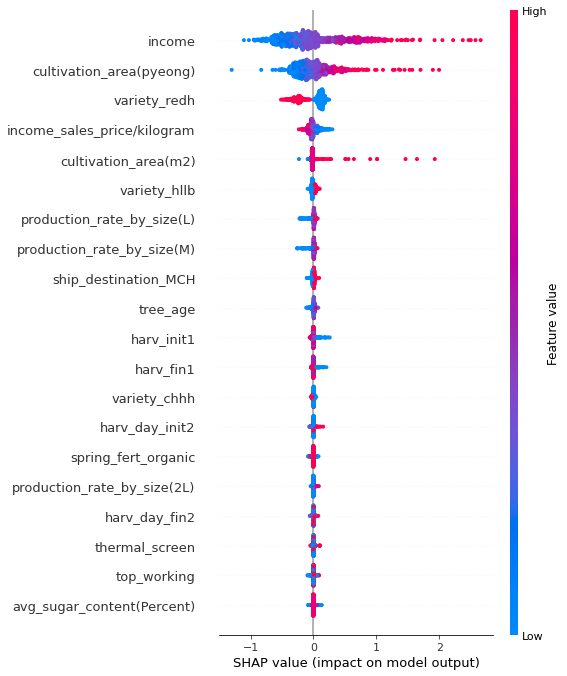

In [ ]:
shap.summary_plot(shap_values, X_train)

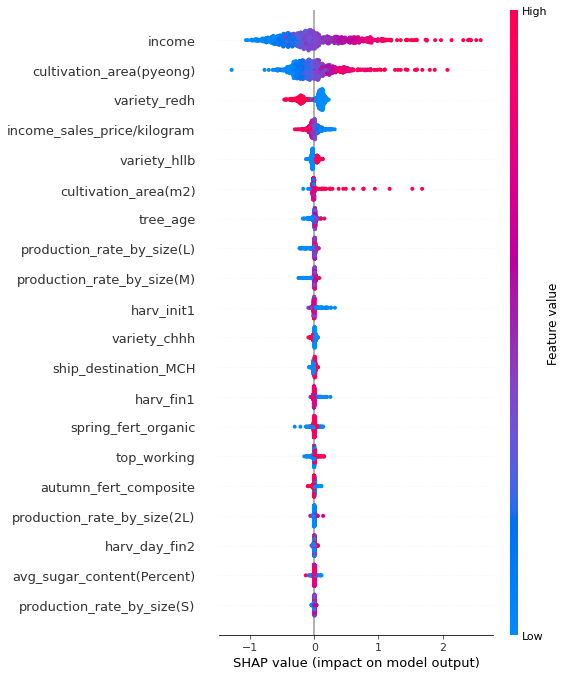

In [ ]:
shap.summary_plot(shap_values, X)

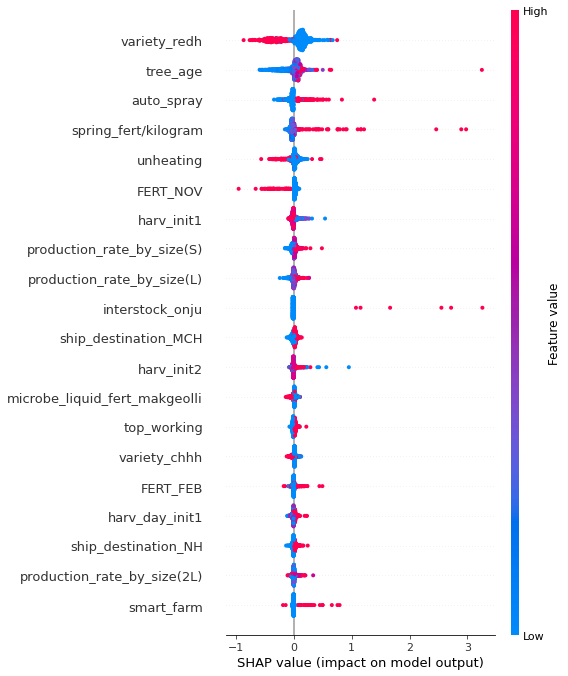

In [38]:
shap.summary_plot(shap_values, X)

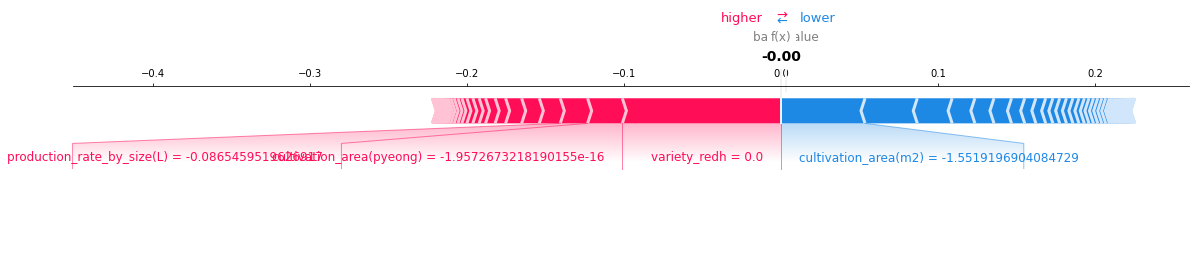

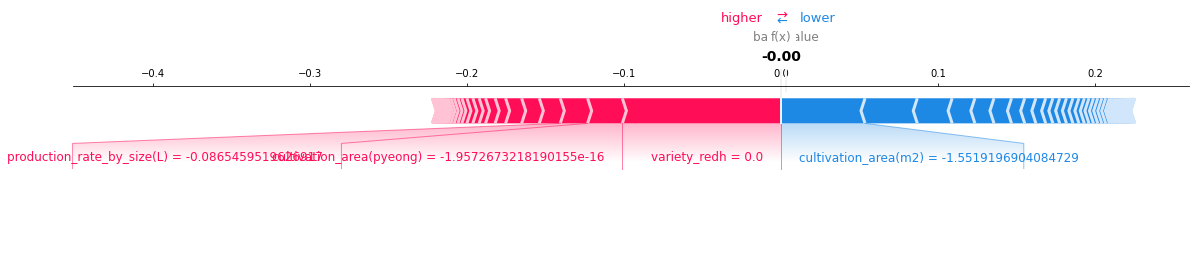

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True,feature_names=X_train.columns, show=False)

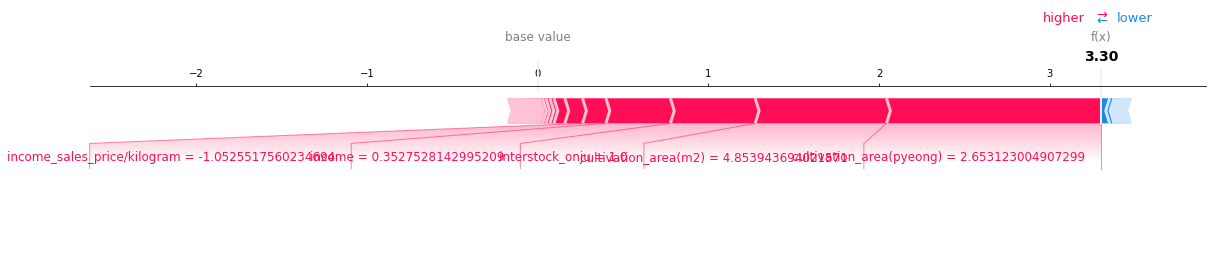

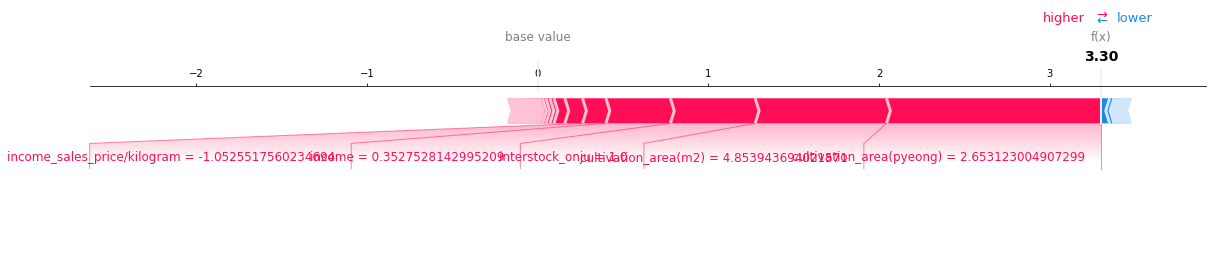

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib=True,feature_names=X.columns, show=False)

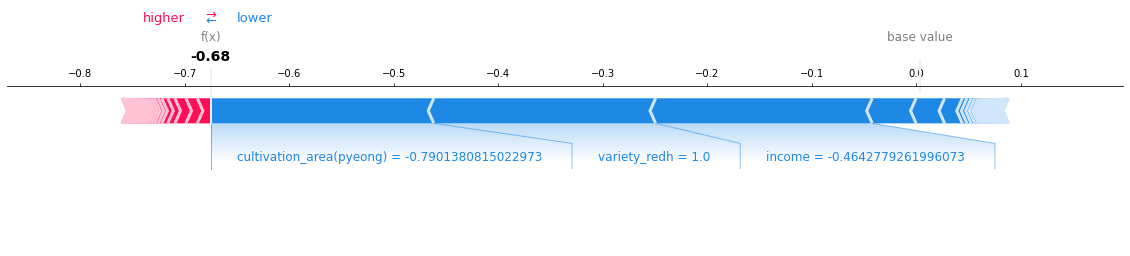

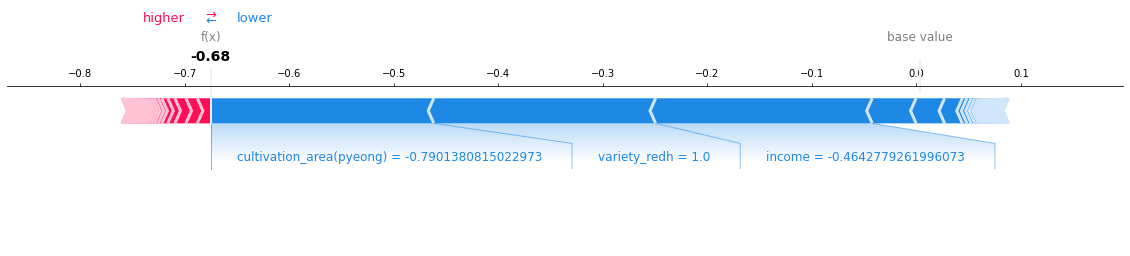

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_train.iloc[1,:], matplotlib=True,feature_names=X_train.columns, show=False)

In [ ]:
shap.initjs()

In [ ]:
#shap.force_plot(explainer.expected_value, shap_values[0:10,:], X_train.iloc[0:10,:], matplotlib=True,feature_names=X_train.columns, show=False)

In [ ]:
#shap_values = explainer.shap_values(X_valid.iloc[0:1000,:], nsamples=1000)
#shap.force_plot(explainer.expected_value, shap_values, X_valid.iloc[0:1000,:])

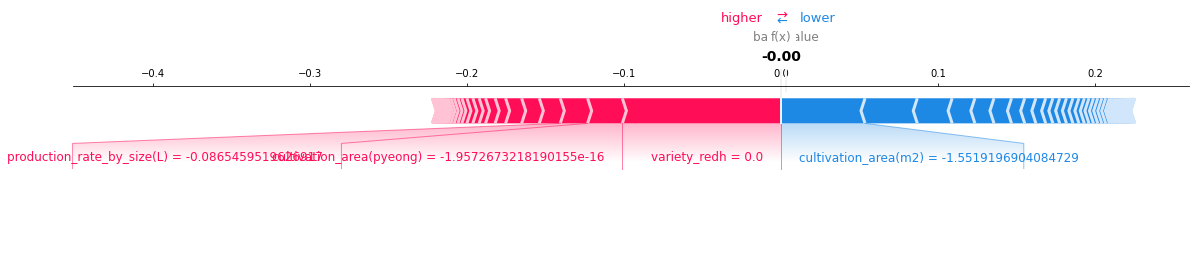

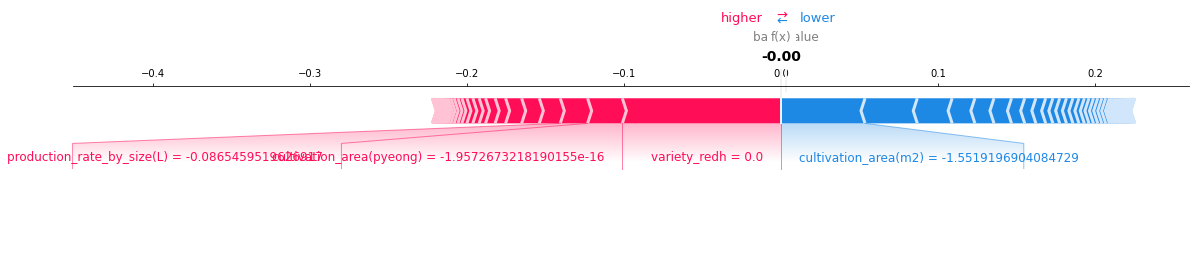

In [ ]:
shap.force_plot(explainer.expected_value, shap_values2[0,:], X_train.iloc[0,:], matplotlib=True,feature_names=X_train.columns, show=False)

In [ ]:
# matplotlib = True is not yet supported for force plots with multiple samples!
shap.force_plot(explainer.expected_value, shap_values2[0:10,:], X_train.iloc[0:10,:], matplotlib=True,feature_names=X_train.columns, show=False)

In [ ]:
#p = shap.force_plot(explainer.expected_value, shap_values2[0:10,:], X_train.iloc[0:10,:], matplotlib=True,feature_names=X_train.columns, show=False)
#shap.save_html('my_force_plot.html', p)

In [ ]:
#p = shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:],link="logit")
#shap.save_html('my_force_plot.html', p)

In [ ]:
len(X_train.columns)

87

In [39]:
explainer = shap.Explainer(model10)

In [ ]:
shap_values = explainer(X_train)

In [40]:
shap_values = explainer(X)

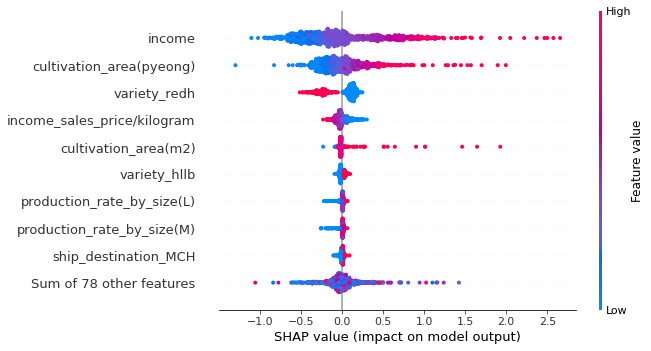

In [ ]:
shap.plots.beeswarm(shap_values)

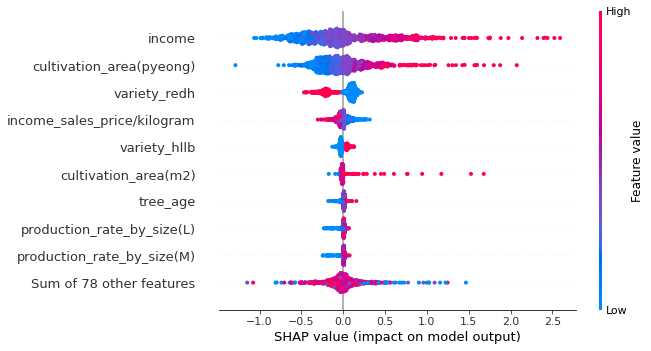

In [ ]:
shap.plots.beeswarm(shap_values)

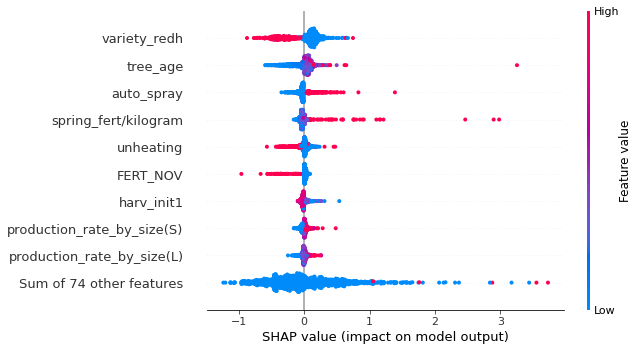

In [41]:
shap.plots.beeswarm(shap_values)

Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.
Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.


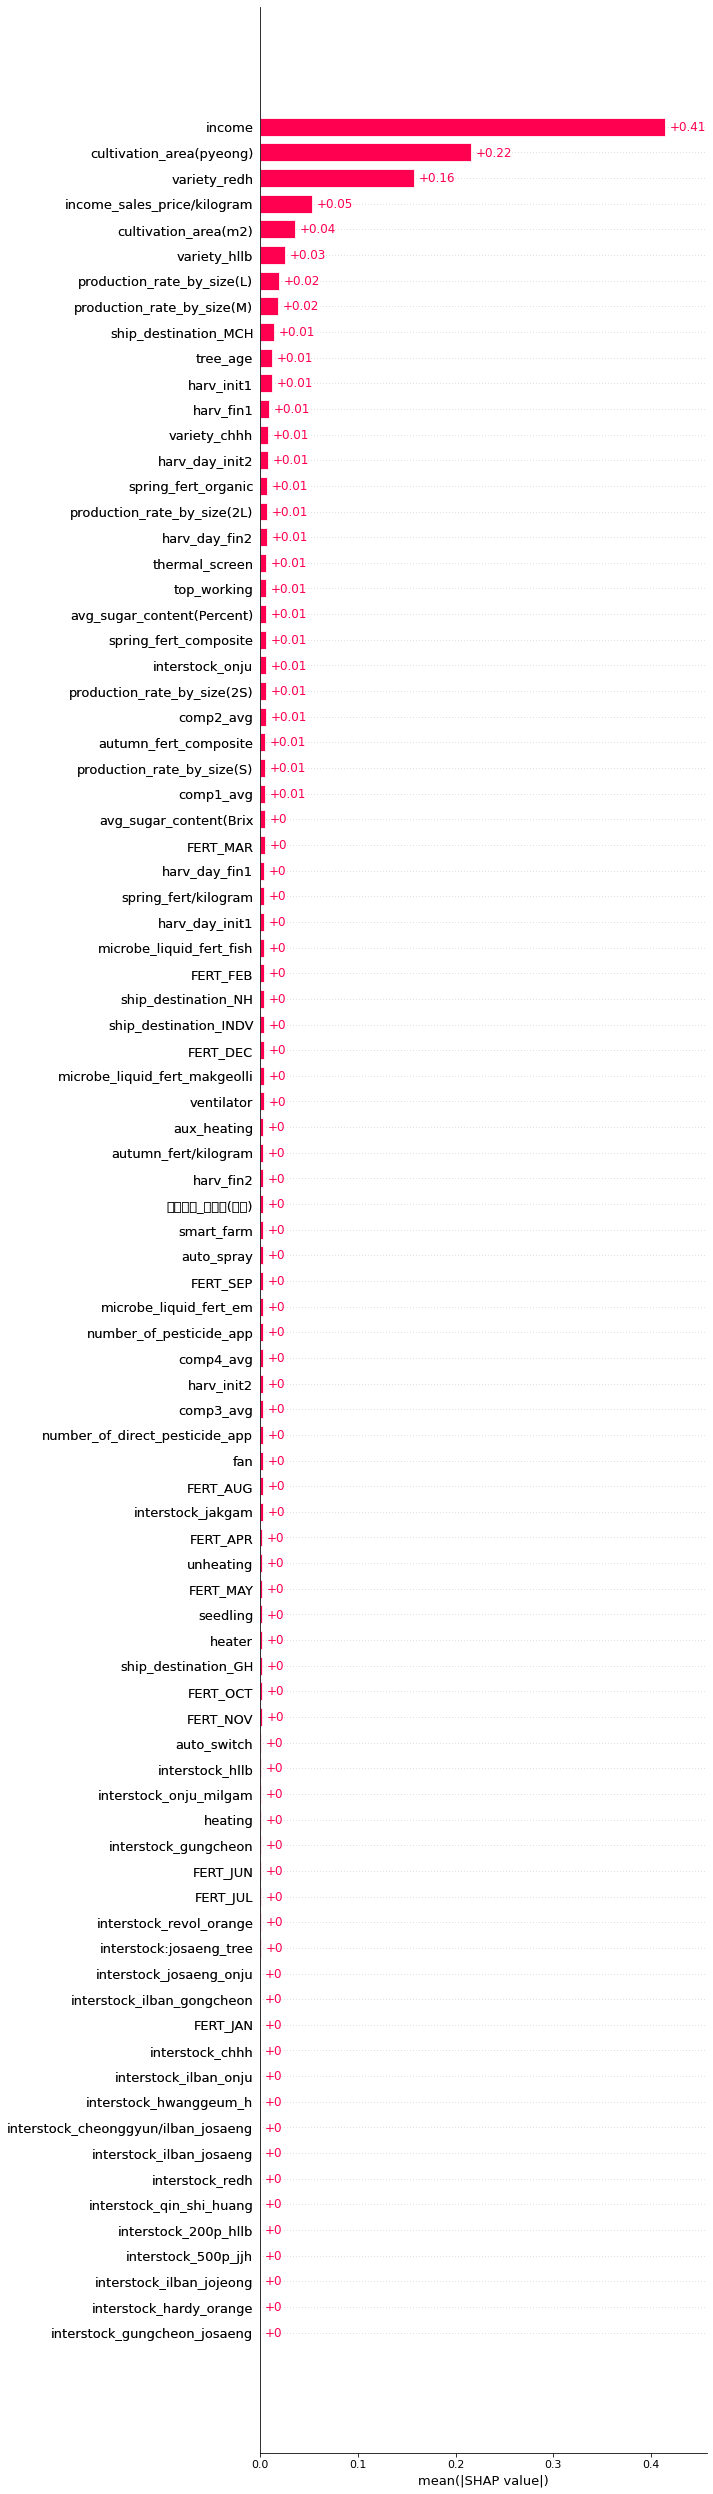

In [ ]:
shap.plots.bar(shap_values, max_display=87) # 

Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.
Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.


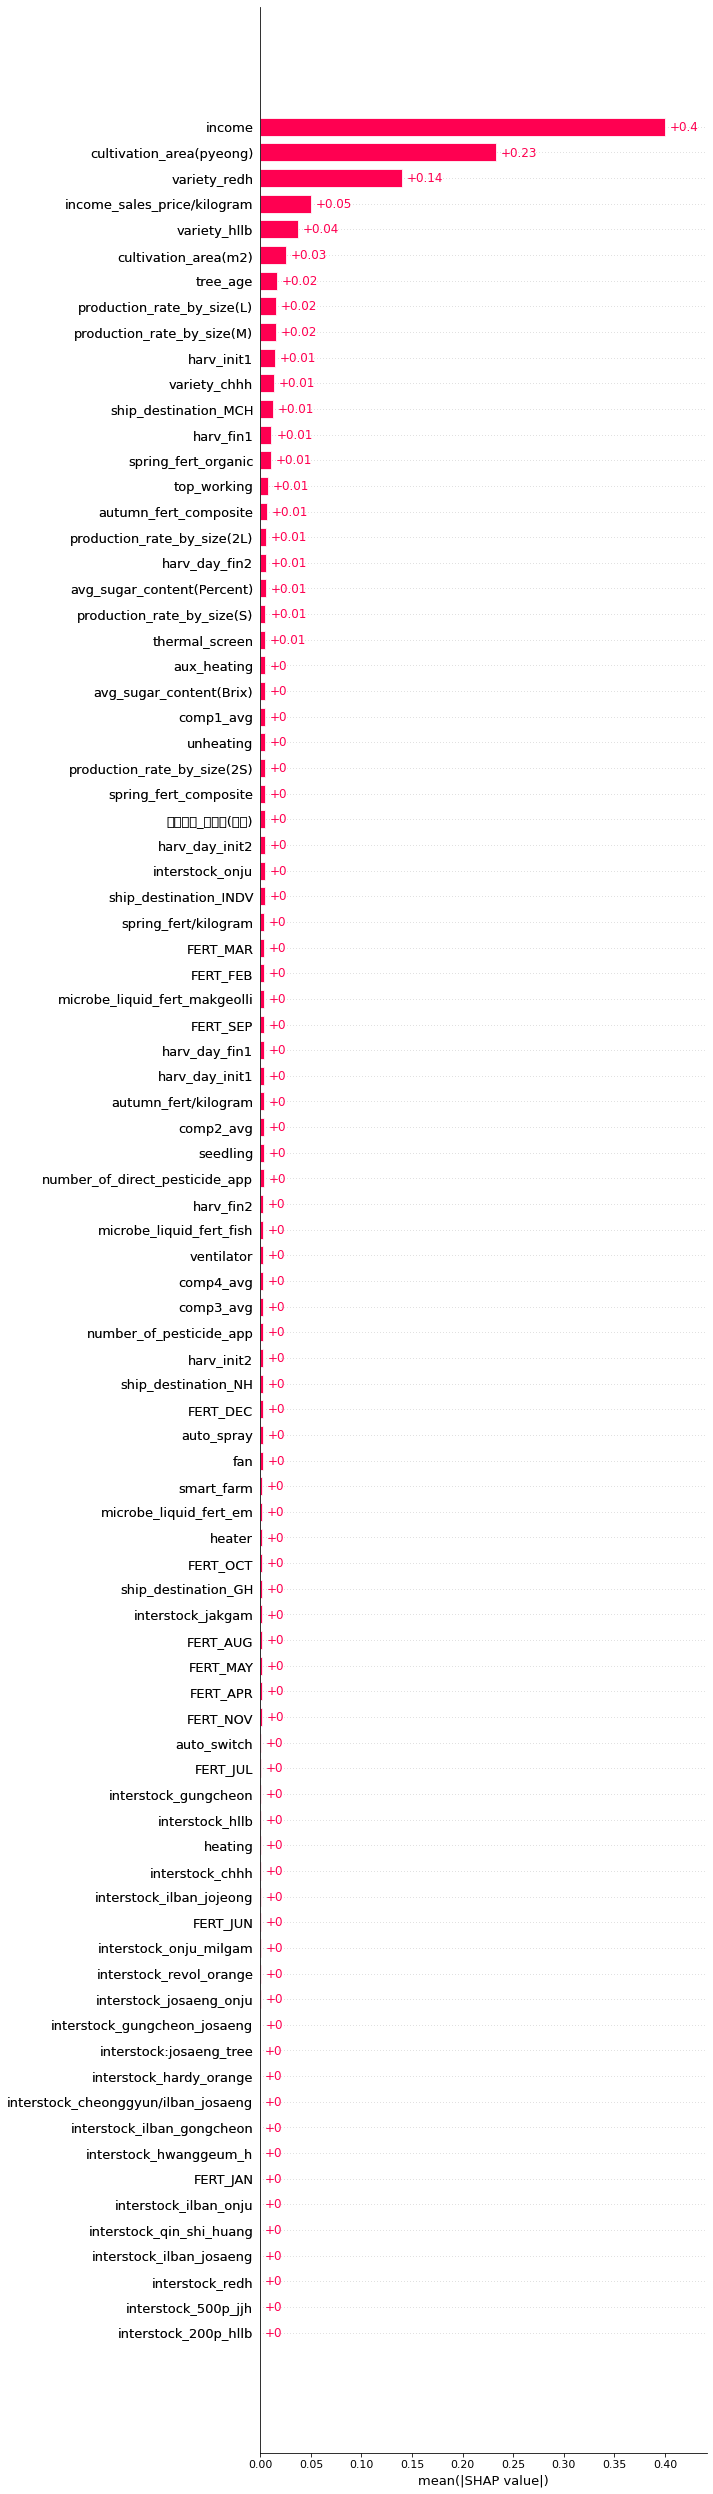

In [ ]:
shap.plots.bar(shap_values, max_display=87)

Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.
Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.


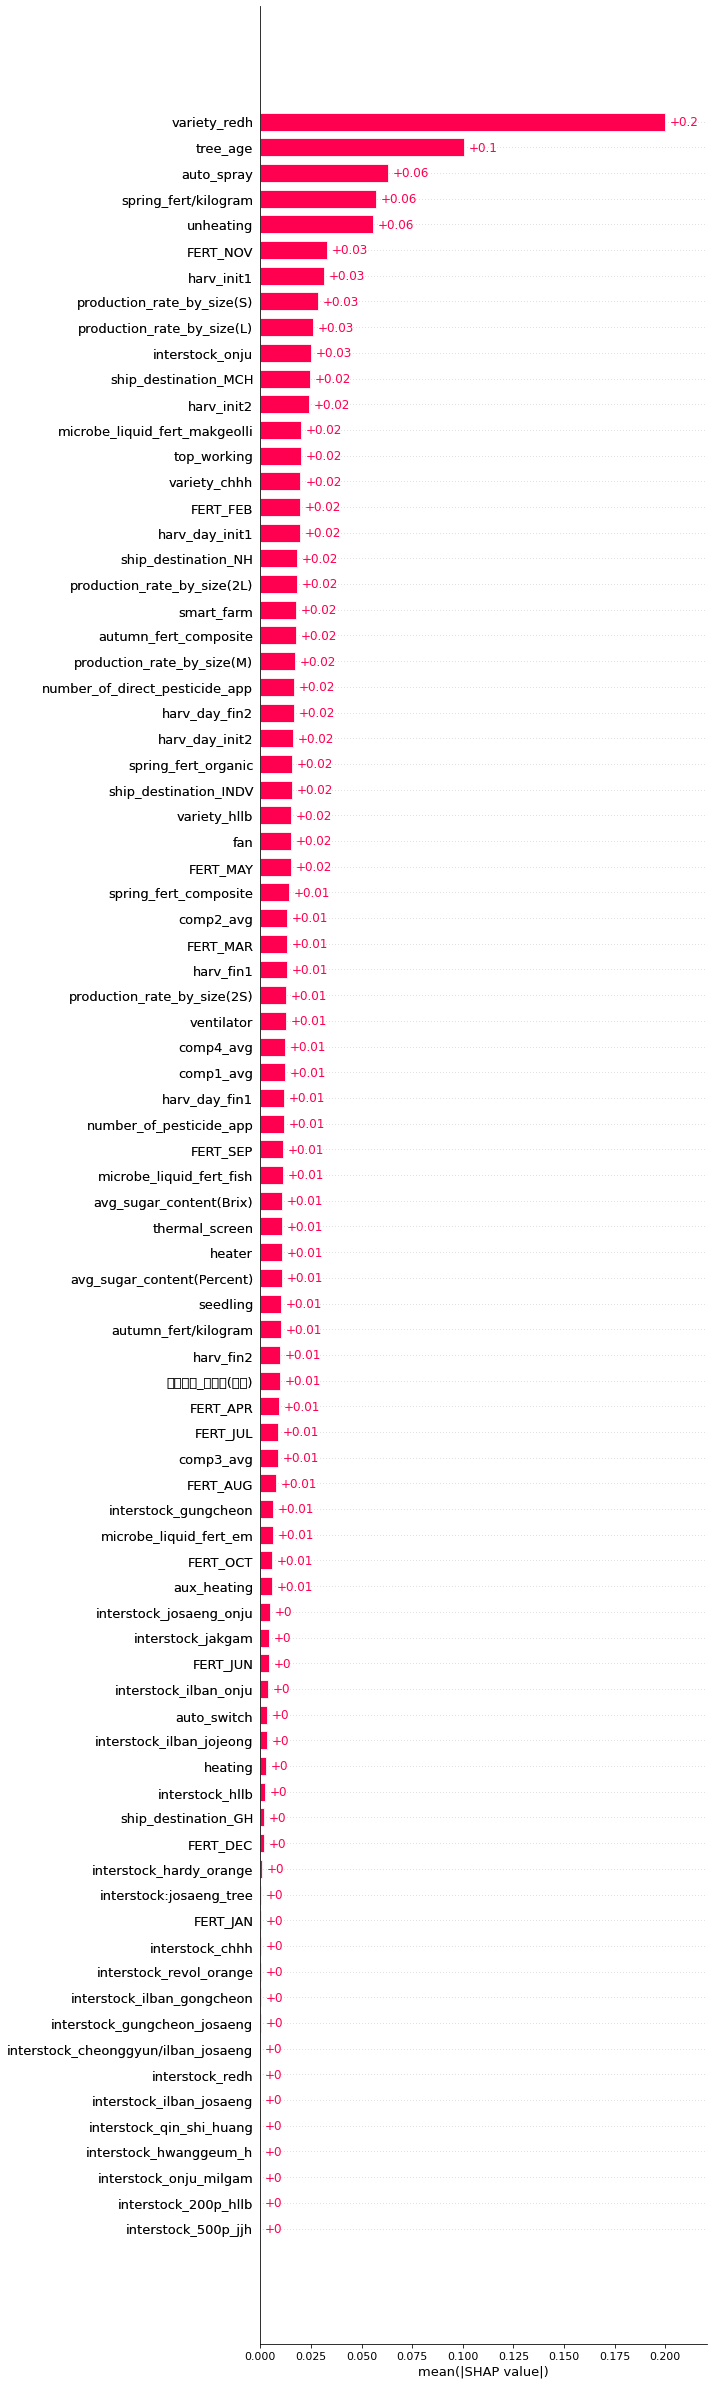

In [42]:
shap.plots.bar(shap_values, max_display=87)

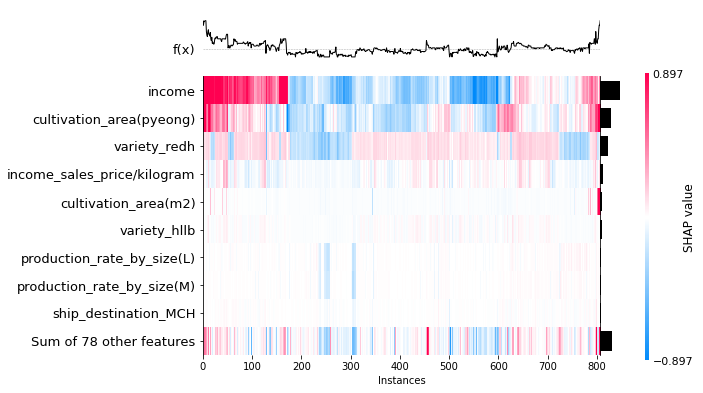

In [ ]:
shap.plots.heatmap(shap_values)

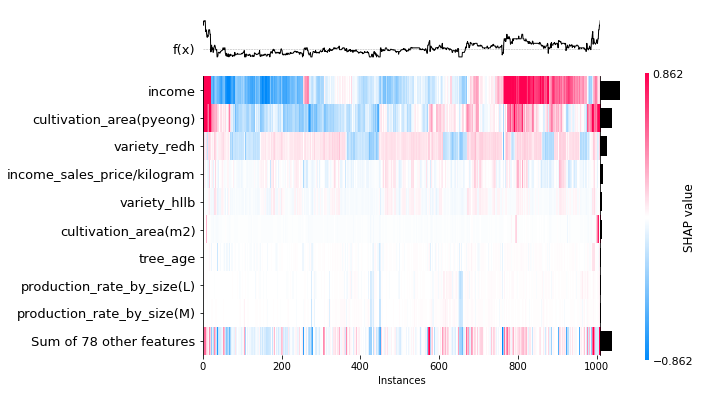

In [ ]:
shap.plots.heatmap(shap_values)

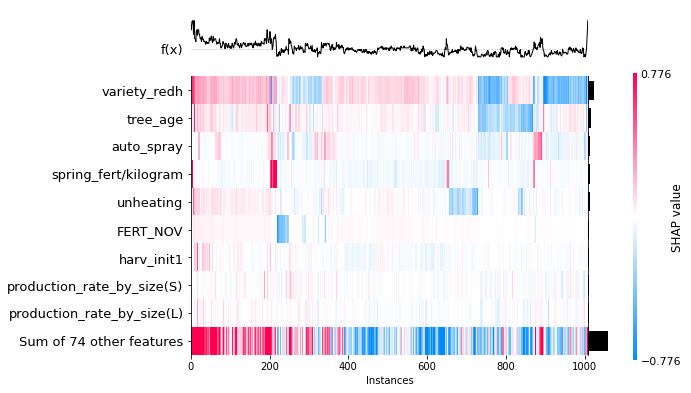

In [43]:
shap.plots.heatmap(shap_values)

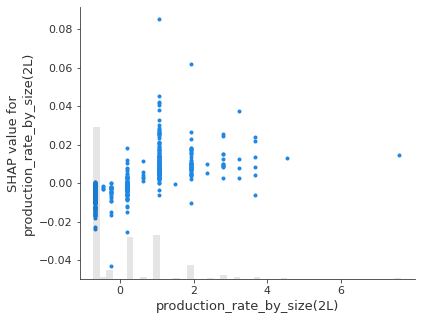

In [ ]:
shap.plots.scatter(shap_values[:, 0])

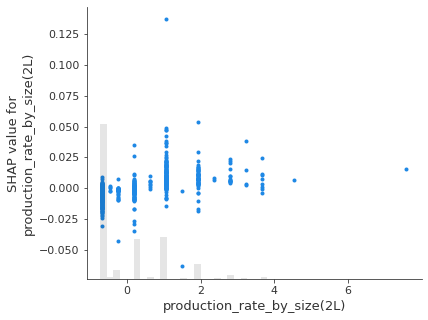

In [ ]:
shap.plots.scatter(shap_values[:, 0])

In [ ]:
model10.feature_importances_

array([4.37915242e-03, 9.39743128e-03, 9.96189449e-03, 3.13143271e-03,
       6.37783963e-03, 3.88882831e-01, 2.63616578e-02, 3.23160744e-03,
       2.02531260e-03, 5.77346551e-03, 3.93985109e-03, 5.25830648e-03,
       7.18396494e-03, 2.37786095e-05, 3.23741652e-03, 5.04920265e-03,
       1.75576635e-03, 1.07078470e-03, 8.74872888e-04, 9.74817539e-04,
       3.34715056e-03, 2.85968662e-03, 2.07297465e-03, 9.42108272e-04,
       1.78783249e-03, 6.39150002e-03, 4.55422226e-03, 8.33760970e-03,
       5.25049635e-03, 6.00959103e-03, 2.68203518e-03, 2.51080583e-03,
       3.74915125e-03, 3.28455772e-03, 4.04544553e-03, 3.62621508e-03,
       5.09367421e-02, 2.08309872e-01, 8.61046965e-03, 2.03177788e-03,
       7.55289344e-03, 1.11256870e-03, 3.49814134e-03, 2.38185174e-03,
       1.33727761e-03, 2.69926800e-03, 3.70655039e-03, 2.94001127e-03,
       5.39425454e-03, 1.82776824e-03, 1.70598628e-03, 5.04959821e-02,
       2.83734998e-03, 6.58470484e-03, 1.10738978e-02, 9.20723492e-04,
      

In [ ]:
model10.feature_importances_

array([4.37915242e-03, 9.39743128e-03, 9.96189449e-03, 3.13143271e-03,
       6.37783963e-03, 3.88882831e-01, 2.63616578e-02, 3.23160744e-03,
       2.02531260e-03, 5.77346551e-03, 3.93985109e-03, 5.25830648e-03,
       7.18396494e-03, 2.37786095e-05, 3.23741652e-03, 5.04920265e-03,
       1.75576635e-03, 1.07078470e-03, 8.74872888e-04, 9.74817539e-04,
       3.34715056e-03, 2.85968662e-03, 2.07297465e-03, 9.42108272e-04,
       1.78783249e-03, 6.39150002e-03, 4.55422226e-03, 8.33760970e-03,
       5.25049635e-03, 6.00959103e-03, 2.68203518e-03, 2.51080583e-03,
       3.74915125e-03, 3.28455772e-03, 4.04544553e-03, 3.62621508e-03,
       5.09367421e-02, 2.08309872e-01, 8.61046965e-03, 2.03177788e-03,
       7.55289344e-03, 1.11256870e-03, 3.49814134e-03, 2.38185174e-03,
       1.33727761e-03, 2.69926800e-03, 3.70655039e-03, 2.94001127e-03,
       5.39425454e-03, 1.82776824e-03, 1.70598628e-03, 5.04959821e-02,
       2.83734998e-03, 6.58470484e-03, 1.10738978e-02, 9.20723492e-04,
      

In [8]:
feature_lst_tst = model10.feature_importances_.tolist()

In [ ]:
feature_lst_tst

[0.004379152418143521,
 0.009397431276636876,
 0.009961894487010911,
 0.0031314327117052806,
 0.006377839625657142,
 0.3888828311520676,
 0.026361657767735847,
 0.003231607436770648,
 0.002025312604247212,
 0.0057734655127693315,
 0.003939851092924534,
 0.005258306483737927,
 0.007183964936543284,
 2.377860947364647e-05,
 0.003237416515359111,
 0.00504920265445032,
 0.0017557663549913056,
 0.0010707847011141769,
 0.0008748728875285813,
 0.0009748175394968333,
 0.003347150559358615,
 0.002859686616037332,
 0.0020729746455022922,
 0.0009421082722123873,
 0.001787832486548558,
 0.006391500022554049,
 0.004554222261635498,
 0.008337609704447206,
 0.005250496354835784,
 0.006009591030302512,
 0.0026820351767802165,
 0.002510805825386071,
 0.0037491512536343523,
 0.003284557722853065,
 0.004045445525419038,
 0.003626215082586883,
 0.05093674210667196,
 0.20830987157137276,
 0.008610469645244813,
 0.0020317778804276082,
 0.007552893440969424,
 0.0011125687037962853,
 0.003498141343157333,
 0.

In [9]:
feature_lst_tst

[0.015495742861414747,
 0.021785071090301637,
 0.022035660603494295,
 0.02013547024101051,
 0.019900159160146817,
 0.012943251791368002,
 0.0029274684474943197,
 0.01393332679649837,
 0.012693870435443082,
 0.021554091447532172,
 0.018501974755241592,
 0.0005135530713559135,
 0.009817689379925013,
 0.009584449967146512,
 0.007658811477038958,
 0.007177154421046955,
 0.003179009740922837,
 0.007829708509371373,
 0.007526541593313123,
 0.010439750444773079,
 0.008851970649734014,
 0.009139481357593751,
 0.0009223305229592641,
 0.061477389287982846,
 0.013564887123284108,
 0.011650784895968672,
 0.013505057598199238,
 0.012413934257266572,
 0.012806618457598838,
 0.010413045796835538,
 0.010962343647754723,
 0.00971988219459247,
 0.01627849679471965,
 0.03543333033672815,
 0.06993366679143792,
 0.010510019744013457,
 0.011998752312222909,
 0.0025616258159381444,
 0.005426260538076549,
 0.008884947920197225,
 0.0056837889474572354,
 0.009694370240302074,
 0.011189139320880039,
 0.010979830

In [ ]:
len(feature_lst_tst)

87

In [10]:
len(feature_lst_tst)

83

In [11]:
feature_lst_tst.sort(reverse=True)

In [ ]:
print(feature_lst_tst)

[0.3888828311520676, 0.20830987157137276, 0.05093674210667196, 0.050495982073907555, 0.026361657767735847, 0.011073897810994366, 0.009961894487010911, 0.009397431276636876, 0.008648722796563578, 0.008610469645244813, 0.008337609704447206, 0.007552893440969424, 0.007214695873142954, 0.007183964936543284, 0.00696363923569481, 0.006840585572170613, 0.00681354211110239, 0.006687159018160679, 0.006584704843995151, 0.006391500022554049, 0.006377839625657142, 0.006009591030302512, 0.0057734655127693315, 0.005755787358307927, 0.005394254537966482, 0.005258306483737927, 0.005250496354835784, 0.00504920265445032, 0.004554222261635498, 0.004379152418143521, 0.004297512497742869, 0.004045445525419038, 0.003939851092924534, 0.0039196847748770676, 0.003762945761808877, 0.0037491512536343523, 0.0037065503934495593, 0.003626215082586883, 0.003617195653860357, 0.003498141343157333, 0.0033677150479796184, 0.003347150559358615, 0.003284557722853065, 0.003237416515359111, 0.003231607436770648, 0.003131432

In [12]:
print(feature_lst_tst)

[0.06993366679143792, 0.061477389287982846, 0.05352412377345234, 0.04133601815446907, 0.03543333033672815, 0.027973082610439546, 0.02317222002778319, 0.022035660603494295, 0.021785071090301637, 0.021554091447532172, 0.020712214286383864, 0.02013547024101051, 0.019900159160146817, 0.01986544145072536, 0.019502904738091166, 0.018501974755241592, 0.016730293581625578, 0.01627849679471965, 0.016041052763558272, 0.015495742861414747, 0.015402493663436236, 0.015130278821127194, 0.01393332679649837, 0.013564887123284108, 0.013505533702458893, 0.013505057598199238, 0.012943251791368002, 0.012806618457598838, 0.012762934853505627, 0.012693870435443082, 0.012413934257266572, 0.011998752312222909, 0.011828266953744858, 0.011713658906982609, 0.011650784895968672, 0.011487787052219277, 0.011189139320880039, 0.010979830120061628, 0.010962343647754723, 0.010510019744013457, 0.010439750444773079, 0.010413045796835538, 0.009817689379925013, 0.00971988219459247, 0.009694370240302074, 0.00958444996714651

In [ ]:
values2find = [0.3888828311520676, 0.20830987157137276, 0.05093674210667196, 0.050495982073907555, 0.026361657767735847, 0.011073897810994366, 0.009961894487010911, 0.009397431276636876, 0.008648722796563578, 0.008610469645244813, 0.008337609704447206, 0.007552893440969424, 0.007214695873142954, 0.007183964936543284, 0.00696363923569481, 0.006840585572170613, 0.00681354211110239, 0.006687159018160679, 0.006584704843995151, 0.006391500022554049, 0.006377839625657142, 0.006009591030302512, 0.0057734655127693315, 0.005755787358307927, 0.005394254537966482, 0.005258306483737927, 0.005250496354835784, 0.00504920265445032]

In [13]:
values2find = [0.06993366679143792, 0.061477389287982846, 0.05352412377345234, 0.04133601815446907, 0.03543333033672815, 0.027973082610439546, 0.02317222002778319, 0.022035660603494295, 0.021785071090301637, 0.021554091447532172, 0.020712214286383864, 0.02013547024101051, 0.019900159160146817, 0.01986544145072536, 0.019502904738091166, 0.018501974755241592]

In [ ]:
len(values2find)

28

In [14]:
len(values2find)

16

In [ ]:
values2find[7],

0.009397431276636876

In [ ]:
int_bag = []
for i in range(len(feature_lst_tst)):
  for j in range(len(values2find)):
    if feature_lst_tst[i] == values2find[j]:
        print(j)
        print('-'*10)
        int_bag.append(j)

7
----------
6
----------
20
----------
0
----------
4
----------
22
----------
25
----------
13
----------
27
----------
19
----------
10
----------
26
----------
21
----------
2
----------
1
----------
9
----------
11
----------
24
----------
3
----------
18
----------
5
----------
12
----------
15
----------
8
----------
23
----------
16
----------
17
----------
14
----------


In [18]:
int_bag = []
for i in range(len(feature_lst_tst)):
    for j in range(len(values2find)):
        if feature_lst_tst[i] == values2find[j]:
            print(j)
            print('-'*10)
            int_bag.append(j)

0
----------
1
----------
2
----------
3
----------
4
----------
5
----------
6
----------
7
----------
8
----------
9
----------
10
----------
11
----------
12
----------
13
----------
14
----------
15
----------


In [ ]:
feature_lst_tst[0]

0.004379152418143521

In [ ]:
values2find[0]

0.3888828311520676

In [ ]:
len(int_bag)

28

In [ ]:
X.columns[int_bag]

Index(['ship_destination_NH', 'income_sales_price/kilogram', 'FERT_AUG',
       'production_rate_by_size(2L)', 'production_rate_by_size(2S)',
       'FERT_OCT', 'spring_fert/kilogram', 'FERT_JAN', 'spring_fert_organic',
       'FERT_JUL', 'ship_destination_INDV', 'spring_fert_composite',
       'FERT_SEP', 'production_rate_by_size(M)', 'production_rate_by_size(L)',
       'ship_destination_MCH', 'avg_sugar_content(Brix', 'FERT_DEC',
       'production_rate_by_size(S)', 'FERT_JUN', 'income',
       'avg_sugar_content(Percent)', 'FERT_MAR', 'ship_destination_GH',
       'FERT_NOV', 'FERT_APR', 'FERT_MAY', 'FERT_FEB'],
      dtype='object')

In [ ]:
df_org_modified7 = pd.read_csv('/content/df_orange_preprocessed4_std_scaled.csv')
df_org_modified7 = df_org_modified7.drop('Unnamed: 0',axis=1)

In [ ]:
X_prime = df_org_modified7[df_org_modified7.columns.drop('연간_생산량')]
y_prime = df_org_modified7['연간_생산량']

In [ ]:
X_prime.columns[int_bag]

Index(['출하처_농협', '조수익_킬로그램판매가격', '비료_8월', '규격별_생산비율(2L)', '규격별_생산비율(2S)',
       '비료_10월', '봄비료_킬로그램', '비료_1월', '봄비료_유기질(퇴비)', '비료_7월', '출하처_개인판매',
       '봄비료_복합비료', '비료_9월', '규격별_생산비율(M)', '규격별_생산비율(L)', '출하처_상인',
       '평균당도(브릭스)', '비료_12월', '규격별_생산비율(S)', '비료_6월', '조수익', '평균당도_평균산도(퍼센트)',
       '비료_3월', '출하처_감협', '비료_11월', '비료_4월', '비료_5월', '비료_2월'],
      dtype='object')

In [21]:
import numpy as np

In [ ]:
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model10.estimators_],
                                        axis = 0)

In [22]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model10.estimators_],
                                        axis = 0)

In [24]:
import matplotlib.pyplot as plt

Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.
Glyph 44032 missing from current font.
Glyph 51012 missing from current font.
Glyph 48708 missing from current font.
Glyph 47308 missing from current font.
Glyph 50976 missing from current font.
Glyph 44592 missing from current font.
Glyph 51656 missing from current font.
Glyph 53748 missing from current font.


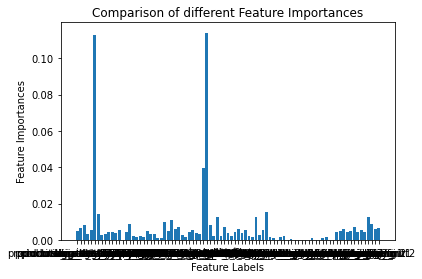

In [ ]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

C:\Users\thsong\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thsong\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thsong\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thsong\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thsong\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thsong\Anacond

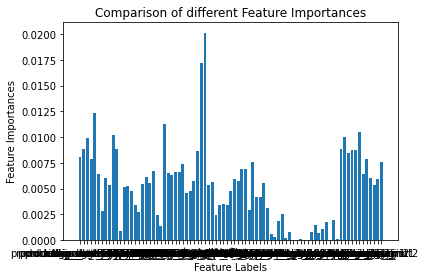

In [25]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
feature_importance_normalized

array([5.03395249e-03, 6.74127125e-03, 8.22139779e-03, 3.20324959e-03,
       5.22009844e-03, 1.12953141e-01, 1.40693301e-02, 2.87138546e-03,
       3.36992107e-03, 4.08496234e-03, 4.16269874e-03, 3.94419102e-03,
       5.70546019e-03, 8.33930214e-05, 4.20033525e-03, 8.72187131e-03,
       2.28851035e-03, 1.49168773e-03, 2.13281064e-03, 1.84958103e-03,
       4.73158699e-03, 3.40587243e-03, 3.03060138e-03, 9.15616015e-04,
       1.07221926e-03, 9.95382432e-03, 4.84256506e-03, 1.07091193e-02,
       5.77038547e-03, 7.18317506e-03, 2.64048303e-03, 1.85938484e-03,
       4.24967081e-03, 5.39563483e-03, 3.90429925e-03, 3.12367059e-03,
       3.96336493e-02, 1.13963299e-01, 8.46466991e-03, 2.04542092e-03,
       1.25339627e-02, 2.33910705e-03, 7.16468360e-03, 3.77950999e-03,
       1.86895980e-03, 4.36282537e-03, 6.15919790e-03, 3.81325938e-03,
       5.17606437e-03, 2.04605201e-03, 1.54319629e-03, 1.23979140e-02,
       2.50516510e-03, 5.35406728e-03, 1.52419359e-02, 1.52335455e-03,
      

In [26]:
feature_importance_normalized

array([8.11454146e-03, 8.82814174e-03, 9.88733947e-03, 7.90905669e-03,
       1.23274089e-02, 6.40930704e-03, 2.82577885e-03, 6.05041992e-03,
       5.37271756e-03, 1.02339065e-02, 8.88556246e-03, 8.61547774e-04,
       5.12473857e-03, 5.25969293e-03, 4.71155596e-03, 3.43988845e-03,
       2.73174192e-03, 5.40127416e-03, 6.15652413e-03, 5.56753436e-03,
       6.73610520e-03, 2.44810167e-03, 1.31928572e-03, 1.12971349e-02,
       6.52795487e-03, 6.28121311e-03, 6.58389093e-03, 6.62152760e-03,
       7.40875662e-03, 4.57225478e-03, 4.80071927e-03, 5.69138416e-03,
       8.67253675e-03, 1.71951617e-02, 2.01517321e-02, 5.34600594e-03,
       5.63315889e-03, 2.45674897e-03, 3.36342986e-03, 3.51104318e-03,
       3.42872009e-03, 4.72657285e-03, 5.96876460e-03, 5.75935860e-03,
       6.89429274e-03, 6.88443966e-03, 2.92328335e-03, 7.61758454e-03,
       4.15670862e-03, 4.17828479e-03, 5.49329892e-03, 3.11459819e-03,
       6.01239460e-04, 3.26856770e-04, 1.79257975e-03, 2.52971045e-03,
      

In [ ]:
lst_tst = [5.03395249e-03, 6.74127125e-03, 8.22139779e-03, 3.20324959e-03,
       5.22009844e-03, 1.12953141e-01, 1.40693301e-02, 2.87138546e-03,
       3.36992107e-03, 4.08496234e-03, 4.16269874e-03, 3.94419102e-03,
       5.70546019e-03, 8.33930214e-05, 4.20033525e-03, 8.72187131e-03,
       2.28851035e-03, 1.49168773e-03, 2.13281064e-03, 1.84958103e-03,
       4.73158699e-03, 3.40587243e-03, 3.03060138e-03, 9.15616015e-04,
       1.07221926e-03, 9.95382432e-03, 4.84256506e-03, 1.07091193e-02,
       5.77038547e-03, 7.18317506e-03, 2.64048303e-03, 1.85938484e-03,
       4.24967081e-03, 5.39563483e-03, 3.90429925e-03, 3.12367059e-03,
       3.96336493e-02, 1.13963299e-01, 8.46466991e-03, 2.04542092e-03,
       1.25339627e-02, 2.33910705e-03, 7.16468360e-03, 3.77950999e-03,
       1.86895980e-03, 4.36282537e-03, 6.15919790e-03, 3.81325938e-03,
       5.17606437e-03, 2.04605201e-03, 1.54319629e-03, 1.23979140e-02,
       2.50516510e-03, 5.35406728e-03, 1.52419359e-02, 1.52335455e-03,
       1.26883238e-03, 1.61752399e-04, 1.33590499e-03, 2.12345702e-03,
       3.26746351e-05, 4.89046098e-04, 1.59855271e-04, 0.00000000e+00,
       2.56718054e-05, 0.00000000e+00, 0.00000000e+00, 8.54683125e-04,
       0.00000000e+00, 0.00000000e+00, 1.11971321e-03, 1.34188158e-03,
       1.79967885e-06, 0.00000000e+00, 4.30535654e-03, 4.68509972e-03,
       5.96430239e-03, 4.37267668e-03, 4.78882974e-03, 7.33994853e-03,
       4.40400486e-03, 5.34880312e-03, 4.50995268e-03, 1.28605531e-02,
       8.62387832e-03, 5.75934057e-03, 6.59114954e-03]

In [27]:
lst_tst = [8.11454146e-03, 8.82814174e-03, 9.88733947e-03, 7.90905669e-03,
       1.23274089e-02, 6.40930704e-03, 2.82577885e-03, 6.05041992e-03,
       5.37271756e-03, 1.02339065e-02, 8.88556246e-03, 8.61547774e-04,
       5.12473857e-03, 5.25969293e-03, 4.71155596e-03, 3.43988845e-03,
       2.73174192e-03, 5.40127416e-03, 6.15652413e-03, 5.56753436e-03,
       6.73610520e-03, 2.44810167e-03, 1.31928572e-03, 1.12971349e-02,
       6.52795487e-03, 6.28121311e-03, 6.58389093e-03, 6.62152760e-03,
       7.40875662e-03, 4.57225478e-03, 4.80071927e-03, 5.69138416e-03,
       8.67253675e-03, 1.71951617e-02, 2.01517321e-02, 5.34600594e-03,
       5.63315889e-03, 2.45674897e-03, 3.36342986e-03, 3.51104318e-03,
       3.42872009e-03, 4.72657285e-03, 5.96876460e-03, 5.75935860e-03,
       6.89429274e-03, 6.88443966e-03, 2.92328335e-03, 7.61758454e-03,
       4.15670862e-03, 4.17828479e-03, 5.49329892e-03, 3.11459819e-03,
       6.01239460e-04, 3.26856770e-04, 1.79257975e-03, 2.52971045e-03,
       1.99530062e-04, 7.20421186e-04, 1.06393359e-05, 1.49812817e-05,
       7.12704777e-05, 0.00000000e+00, 0.00000000e+00, 7.59813011e-04,
       1.48034852e-03, 6.76571984e-04, 1.10514501e-03, 1.77626196e-03,
       2.70454372e-05, 1.90133364e-03, 4.42030284e-05, 8.83088514e-03,
       1.00549502e-02, 8.45071130e-03, 8.74163262e-03, 8.75803999e-03,
       1.04899877e-02, 6.37466668e-03, 7.86296827e-03, 5.99227491e-03,
       5.33261053e-03, 5.95985716e-03, 7.60046951e-03]

In [ ]:
len(lst_tst)

87

In [28]:
len(lst_tst)

83

In [ ]:
max(lst_tst)

0.113963299

In [ ]:
type(lst_tst)

list

In [ ]:
lst_tst

[0.113963299,
 0.112953141,
 0.0396336493,
 0.0152419359,
 0.0140693301,
 0.0128605531,
 0.0125339627,
 0.012397914,
 0.0107091193,
 0.00995382432,
 0.00872187131,
 0.00862387832,
 0.00846466991,
 0.00822139779,
 0.00733994853,
 0.00718317506,
 0.0071646836,
 0.00674127125,
 0.00659114954,
 0.0061591979,
 0.00596430239,
 0.00577038547,
 0.00575934057,
 0.00570546019,
 0.00539563483,
 0.00535406728,
 0.00534880312,
 0.00522009844,
 0.00517606437,
 0.00503395249,
 0.00484256506,
 0.00478882974,
 0.00473158699,
 0.00468509972,
 0.00450995268,
 0.00440400486,
 0.00437267668,
 0.00436282537,
 0.00430535654,
 0.00424967081,
 0.00420033525,
 0.00416269874,
 0.00408496234,
 0.00394419102,
 0.00390429925,
 0.00381325938,
 0.00377950999,
 0.00340587243,
 0.00336992107,
 0.00320324959,
 0.00312367059,
 0.00303060138,
 0.00287138546,
 0.00264048303,
 0.0025051651,
 0.00233910705,
 0.00228851035,
 0.00213281064,
 0.00212345702,
 0.00204605201,
 0.00204542092,
 0.0018689598,
 0.00185938484,
 0.00184

In [33]:
lst_tst

[0.00811454146,
 0.00882814174,
 0.00988733947,
 0.00790905669,
 0.0123274089,
 0.00640930704,
 0.00282577885,
 0.00605041992,
 0.00537271756,
 0.0102339065,
 0.00888556246,
 0.000861547774,
 0.00512473857,
 0.00525969293,
 0.00471155596,
 0.00343988845,
 0.00273174192,
 0.00540127416,
 0.00615652413,
 0.00556753436,
 0.0067361052,
 0.00244810167,
 0.00131928572,
 0.0112971349,
 0.00652795487,
 0.00628121311,
 0.00658389093,
 0.0066215276,
 0.00740875662,
 0.00457225478,
 0.00480071927,
 0.00569138416,
 0.00867253675,
 0.0171951617,
 0.0201517321,
 0.00534600594,
 0.00563315889,
 0.00245674897,
 0.00336342986,
 0.00351104318,
 0.00342872009,
 0.00472657285,
 0.0059687646,
 0.0057593586,
 0.00689429274,
 0.00688443966,
 0.00292328335,
 0.00761758454,
 0.00415670862,
 0.00417828479,
 0.00549329892,
 0.00311459819,
 0.00060123946,
 0.00032685677,
 0.00179257975,
 0.00252971045,
 0.000199530062,
 0.000720421186,
 1.06393359e-05,
 1.49812817e-05,
 7.12704777e-05,
 0.0,
 0.0,
 0.000759813011

In [34]:
sorted(lst_tst, reverse=True)[:15]

[0.0201517321,
 0.0171951617,
 0.0123274089,
 0.0112971349,
 0.0104899877,
 0.0102339065,
 0.0100549502,
 0.00988733947,
 0.00888556246,
 0.00883088514,
 0.00882814174,
 0.00875803999,
 0.00874163262,
 0.00867253675,
 0.0084507113]

In [ ]:
values2find = [0.113963299,
 0.112953141,
 0.0396336493,
 0.0152419359,
 0.0140693301,
 0.0128605531,
 0.0125339627,
 0.012397914,
 0.0107091193,
 0.00995382432,
 0.00872187131,
 0.00862387832,
 0.00846466991,
 0.00822139779,
 0.00733994853]

In [30]:
values2find = [0.0201517321,
 0.0171951617,
 0.0123274089,
 0.0112971349,
 0.0104899877,
 0.0102339065,
 0.0100549502,
 0.00988733947,
 0.00888556246,
 0.00883088514,
 0.00882814174,
 0.00875803999,
 0.00874163262,
 0.00867253675,
 0.0084507113]

In [ ]:
int_bag = []
for i in range(len(lst_tst)):
    if lst_tst[i] in values2find:
        print(i)
        print('-'*10)
        int_bag.append(i)

0
----------
1
----------
2
----------
3
----------
4
----------
5
----------
6
----------
7
----------
8
----------
9
----------
10
----------
11
----------
12
----------
13
----------
14
----------


In [ ]:
int_bag = []
for i in range(len(lst_tst)):
  for j in range(len(values2find)):
    if lst_tst[i] == values2find[j]:
        print(i,j)
        print('-'*10)
        int_bag.append(j)

2 13
----------
5 1
----------
6 4
----------
15 10
----------
25 9
----------
27 8
----------
36 2
----------
37 0
----------
38 12
----------
40 6
----------
51 7
----------
54 3
----------
79 14
----------
83 5
----------
84 11
----------


In [31]:
int_bag = []
for i in range(len(lst_tst)):
    for j in range(len(values2find)):
        if lst_tst[i] == values2find[j]:
            print(i,j)
            print('-'*10)
            int_bag.append(j)

1 10
----------
2 7
----------
4 2
----------
9 5
----------
10 8
----------
23 3
----------
32 13
----------
33 1
----------
34 0
----------
71 9
----------
72 6
----------
73 14
----------
74 12
----------
75 11
----------
76 4
----------


In [39]:
int_bag = []
for i in range(len(lst_tst)):
    if lst_tst[i] in values2find:
        print(i)
        print('-'*10)
        int_bag.append(i)

1
----------
2
----------
4
----------
9
----------
10
----------
23
----------
32
----------
33
----------
34
----------
71
----------
72
----------
73
----------
74
----------
75
----------
76
----------


In [41]:
X.columns[int_bag]

Index(['production_rate_by_size(L)', 'production_rate_by_size(M)',
       'production_rate_by_size(2S)', 'avg_sugar_content(Brix)',
       'avg_sugar_content(Percent)', 'spring_fert/kilogram',
       'number_of_pesticide_app', 'number_of_direct_pesticide_app', 'tree_age',
       'comp1_avg', 'comp2_avg', 'comp3_avg', 'comp4_avg', 'harv_init1',
       'harv_init2'],
      dtype='object')

In [37]:
int_bag

[10, 7, 2, 5, 8, 3, 13, 1, 0, 9, 6, 14, 12, 11, 4]

In [38]:
X.columns[10]

'avg_sugar_content(Percent)'

In [32]:
X.columns[int_bag]

Index(['avg_sugar_content(Percent)', 'ship_destination_MCH',
       'production_rate_by_size(M)', 'ship_destination_NH',
       'ship_destination_INDV', 'production_rate_by_size(S)', 'FERT_MAR',
       'production_rate_by_size(L)', 'production_rate_by_size(2L)',
       'avg_sugar_content(Brix)', 'ship_destination_GH', 'FERT_APR',
       'FERT_FEB', 'FERT_JAN', 'production_rate_by_size(2S)'],
      dtype='object')

In [ ]:
X_prime.columns[int_bag]

Index(['비료_1월', '규격별_생산비율(L)', '규격별_생산비율(2S)', '출하처_개인판매', '출하처_상인', '출하처_감협',
       '규격별_생산비율(M)', '규격별_생산비율(2L)', '평균당도_평균산도(퍼센트)', '조수익_킬로그램판매가격',
       '출하처_농협', '규격별_생산비율(S)', '비료_2월', '조수익', '평균당도(브릭스)'],
      dtype='object')

In [ ]:
X_prime.columns[int_bag]

Index(['비료_1월', '규격별_생산비율(L)', '규격별_생산비율(2S)', '출하처_개인판매', '출하처_상인', '출하처_감협',
       '규격별_생산비율(M)', '규격별_생산비율(2L)', '평균당도_평균산도(퍼센트)', '조수익_킬로그램판매가격',
       '출하처_농협', '규격별_생산비율(S)', '비료_2월', '조수익', '평균당도(브릭스)'],
      dtype='object')

In [ ]:
model10.score(X,y)

0.9363941587360987

In [36]:
#model10.score(X,y)

In [ ]:
model10.score(X_prime,y_prime)

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 가온
- 가을비료_복합비료
- 가을비료_킬로그램
- 고접방식
- 규격별_생산비율(2L)
- ...
Feature names seen at fit time, yet now missing:
- FERT_APR
- FERT_AUG
- FERT_DEC
- FERT_FEB
- FERT_JAN
- ...



0.9363941587360987

In [42]:
model10.fit(X,y)
#----------------------------------
feature_lst_tst = model10.feature_importances_.tolist()
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model10.estimators_],
                                        axis = 0)
#----------------------------------------------------------------------------------
lst_tst = feature_importance_normalized.tolist()
lst_tst2 = sorted(lst_tst, reverse=True)
values2find = lst_tst2[:15]
#-----------------------------
int_bag = []
for i in range(len(values2find)):
    for j in range(len(lst_tst)):
        if values2find[i] == lst_tst[j]:
            int_bag.append(j)
#----------------------------------------------
X.columns[int_bag]

Index(['tree_age', 'number_of_direct_pesticide_app', 'spring_fert/kilogram',
       'production_rate_by_size(2S)', 'harv_init2', 'avg_sugar_content(Brix)',
       'production_rate_by_size(M)', 'comp1_avg', 'comp2_avg',
       'number_of_pesticide_app', 'production_rate_by_size(L)', 'harv_init1',
       'avg_sugar_content(Percent)', 'harv_fin2', 'comp4_avg'],
      dtype='object')

In [43]:
model10.fit(X,y)
#----------------------------------
feature_lst_tst = model10.feature_importances_.tolist()
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model10.estimators_],
                                        axis = 0)
#----------------------------------------------------------------------------------
lst_tst = feature_importance_normalized.tolist()
lst_tst2 = sorted(lst_tst, reverse=True)
values2find = lst_tst2[:15]
#-----------------------------
int_bag = []
for i in range(len(values2find)):
    for j in range(len(lst_tst)):
        if values2find[i] == lst_tst[j]:
            int_bag.append(j)
#----------------------------------------------
X.columns[int_bag]

Index(['tree_age', 'number_of_direct_pesticide_app', 'spring_fert/kilogram',
       'production_rate_by_size(2S)', 'harv_init2', 'avg_sugar_content(Brix)',
       'production_rate_by_size(L)', 'comp2_avg', 'production_rate_by_size(M)',
       'comp1_avg', 'number_of_pesticide_app', 'production_rate_by_size(S)',
       'harv_init1', 'avg_sugar_content(Percent)', 'harv_fin2'],
      dtype='object')